In [2]:
import scipy
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import RisolviSis as utils

## Esercizo 1
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``Dati0.mat``.  Risolvere il sistema utilizzando il metodo più adatto al problema proposto e commentare i risultati ottenuti  giustificandoli alla luce della teoria. 

Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('Dati0.mat')``

``A=dati["A"] ``

`` b=dati["b"] ``

In [4]:
def gauss_seidel(A,b,x0,toll,it_max):
    errore=1000
    d=np.diag(A)
    D=np.diag(d)
    E=np.tril(A,-1)
    F=np.triu(A,1)
    M=D+E
    N=-F
    T=np.dot(np.linalg.inv(M),N)
    autovalori=np.linalg.eigvals(T)
    raggiospettrale=np.max(np.abs(autovalori))
    print("raggio spettrale Gauss-Seidel ",raggiospettrale)
    it=0
    er_vet=[]
    while it<=it_max and errore>=toll:
        temp=b-np.dot(F,x0)
        x,flag=utils.Lsolve(M,temp)
        errore=np.linalg.norm(x-x0)/np.linalg.norm(x)
        er_vet.append(errore)
        x0=x.copy()
        it=it+1
    return x,it,er_vet

Numero di righe:  400  Numero di colonne:  400
Percentuale di elementi non nulli:  1.2 %
La matrice è simmetrica
La matrice è definita positiva
Il numero di condizionamento della matrice è:  178.06427461086074
raggio spettrale Gauss-Seidel  0.9777864028930714
Numero di iterazioni:  645
Errore:  9.980540238201188e-09


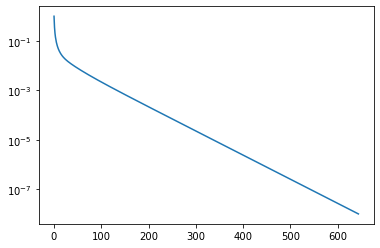

In [5]:
dati = loadmat('Dati0.mat')
A=dati['A']
b=dati['b']
# calcolo il numero di righe e di colonne della matrice A
n,m = A.shape
print("Numero di righe: ",n , " Numero di colonne: ", m)
# controllo se la matrice è densa o sparsa
nz = np.count_nonzero(A)/(n*m)
perc_nz = nz*100
print("Percentuale di elementi non nulli: ", perc_nz, "%") # matrice sparsa
# Controllo se la matrice è simmetrica
if (A.transpose() == A).all():
    print("La matrice è simmetrica")
else :
    print("La matrice non è simmetrica")
# Controllo se la matrice è definita positiva
if np.all(np.linalg.eigvals(A) > 0):
    print("La matrice è definita positiva")
else :
    print("La matrice non è definita positiva")
# Controllo se la matrice è mal condizionata
cond = np.linalg.cond(A)
print("Il numero di condizionamento della matrice è: ", cond)

# se la matrice è simmetrica e definita positiva allora posso usare il metodo di Gauss-Seidel
x0 = np.zeros( (n,1) )
toll = 1e-8
it_max = 1000
x,it,er_vet = gauss_seidel(A,b,x0,toll,it_max)
print("Numero di iterazioni: ", it)
print("Errore: ", er_vet[-1])
plt.semilogy(er_vet)


    

## Esercizio 2

La sequenza 

$$x_1=1$$
$$x_n= 2^{n-1} \left( \sqrt{1+ \frac{x_{n-1}}{2^{n-2}} }-1 \right)    \quad \quad n=2,3,...,\quad (1) $$

converge a $log(2)$, cioè  $\lim_{n \rightarrow \infty} x_n= log(2)$

- Si calcolino i valori della sequenza (1) per $n=1,..,71$

- Costruire un grafico in cui nelle ascisse vi sia  il valore di $n=1,..,71$  e nelle ordinate il corrispondente valore di $x_n$ . 

- La successione converge a log(2)? In corrispondenza di quale $n$ si verifica un pessimo risultato? Spiegare alla luce della teoria

- Manipolando opportunamente la formula (1) scrivere una formula  equivalente  ma piu\' stabile per ottenere la sequenza $\tilde x_n$
algebricamente equivalente alla (1).

- Valutare la formula proposta per calcolare la sequenza $\tilde x_n $ per $n=1,..,71$

- Costruire un grafico in cui nelle ascisse vi sia  il valore di n  e nelle ordinate il corrispondente valore di $\tilde x_n$ 

- Calcolare l'errore relativo di ogni $x_n$ rispetto al valore esatto $log(2)$ 


- Calcolare l'errore relativo di ogni $\tilde x_n$ rispetto al valore esatto $log(2)$

## Esercizo 3
Si consideri il sistema lineare Ax=b, con A matrice e b termine noto memorizzati nel file ``Dati1.mat``.  Risolvere il sistema utilizzando il metodo più adatto al problema proposto e commentare i risultati ottenuti  giustificandoli alla luce della teoria. 


(20, 20)
densità 100.0 %
Matrice simmetrica
Matrice definita positiva
soluzione [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


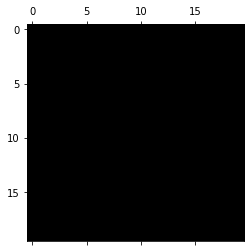

In [14]:
dati = loadmat('Dati1.mat')
A = dati['A']
b = dati['b']
print(A.shape)
plt.spy(A)
print("densità",(np.count_nonzero(A) / (A.shape[0] * A.shape[1])) * 100 , "%") # densità di A (numero di elementi non nulli)

n = A.shape[0]
# calcolo se è simmetrica
if (A.all() == A.T.all()):
    print('Matrice simmetrica')
# calcolo gli autovalori
autovalori = np.linalg.eigvals(A)
if (autovalori.all() > 0):
    print('Matrice definita positiva')
    
# è molto densa quindi la fattorizzo con LU
PT,L,U = scipy.linalg.lu(A)
P = PT.T
y, flag = utils.Lsolve(L, P@b)
x, flag = utils.Usolve(U, y)
print("soluzione", x)